<a href="https://colab.research.google.com/github/nguyetmle/voting-distortion/blob/main/Voting_Distortion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib as mpl
import pandas as pd
import numpy as np
# from matplotlib.cm import get_cmap


# mpl.rcParams.update(mpl.rcParamsDefault) #to reset style
style.use('ggplot')
style.use('tableau-colorblind10')
style.use('seaborn-v0_8-paper')



In [64]:
#read the output file
df = pd.read_csv("output2D.csv")
df.head()



,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,2D,normal,Candidate 3,Candidate 1,1.121464,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0
1,1,200,5,2D,normal,Candidate 2,Candidate 4,1.295058,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
2,2,200,5,2D,normal,Candidate 3,Candidate 1,1.264076,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0
3,3,200,5,2D,normal,Candidate 2,Candidate 1,1.086429,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
4,4,200,5,2D,normal,Candidate 2,Candidate 0,1.131532,Candidate 2,1.0,Candidate 0,1.1315318755843757,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0


In [65]:
#make sure all distortion columns are numeric
df.loc[df["STAR Distortion"] == "False", "STAR Distortion"] = np.nan
df.loc[df["STV Distortion"] == "False", "STV Distortion"] = np.nan
df["STAR Distortion"] = pd.to_numeric(df["STAR Distortion"], errors="coerce")
df["STV Distortion"] = pd.to_numeric(df["STV Distortion"], errors="coerce")


In [66]:
df.head()

,index,n,m,Dimension,Distribution,OPT,Plurality,Plurality Distortion,Copeland,Copeland Distortion,STV,STV Distortion,Borda,Borda Distortion,STAR,STAR Distortion,Plurality Veto,Plurality Veto Distortion
0,0,200,5,2D,normal,Candidate 3,Candidate 1,1.121464,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0
1,1,200,5,2D,normal,Candidate 2,Candidate 4,1.295058,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
2,2,200,5,2D,normal,Candidate 3,Candidate 1,1.264076,Candidate 3,1.0,Candidate 3,1.000000,Candidate 3,1.0,Candidate 3,1.0,Candidate 3,1.0
3,3,200,5,2D,normal,Candidate 2,Candidate 1,1.086429,Candidate 2,1.0,Candidate 2,1.000000,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0
4,4,200,5,2D,normal,Candidate 2,Candidate 0,1.131532,Candidate 2,1.0,Candidate 0,1.131532,Candidate 2,1.0,Candidate 2,1.0,Candidate 2,1.0


In [67]:
main = df.loc[df["Distribution"]=="normal"].groupby(["m","Dimension"]).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
main

,m,Dimension,Plurality_Distortion_avg,Plurality_Distortion_max,Copeland_Distortion_avg,Copeland_Distortion_max,STV_Distortion_avg,STV_Distortion_max,Borda_Distortion_avg,Borda_Distortion_max,STAR_Distortion_avg,STAR_Distortion_max,PluralityVeto_Distortion_avg,PluralityVeto_Distortion_max
0,5,2D,1.039316,1.495461,1.000613,1.056039,1.009175,1.210805,1.003935,1.126350,1.001830,1.134962,1.001782,1.111246
1,10,2D,1.107188,1.738136,1.000619,1.036379,1.031123,1.288385,1.004285,1.123853,1.001816,1.093730,1.004640,1.100219
2,30,2D,1.209913,1.913584,1.000614,1.029022,1.064940,1.262599,1.001720,1.058158,1.004011,1.063705,1.006549,1.105368
3,50,2D,1.258341,2.008395,1.000513,1.015307,1.073161,1.283328,1.001370,1.030096,1.004515,1.049481,1.006596,1.091579
4,75,2D,1.289536,2.051256,1.000645,1.012896,1.077636,1.330604,1.000949,1.021701,1.005053,1.048357,1.006717,1.069284
5,100,2D,1.301426,2.094735,1.000577,1.014259,1.076683,1.297731,1.000876,1.015865,1.005166,1.045946,1.007488,1.084624


In [68]:
#group by both n and m
group_by_m_n_normal = df.loc[df['Distribution'] == "normal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_uniform = df.loc[df['Distribution'] == "uniform"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_poisson = df.loc[df['Distribution'] == "poisson"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_n_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby(['m','n']).agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


In [69]:
#group by distribution 

group_by_distribution_m5  = df.loc[df['m'] == 5].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m10  = df.loc[df['m'] == 10].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m50  = df.loc[df['m'] == 50].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_distribution_m100  = df.loc[df['m'] == 100].groupby("Distribution").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))


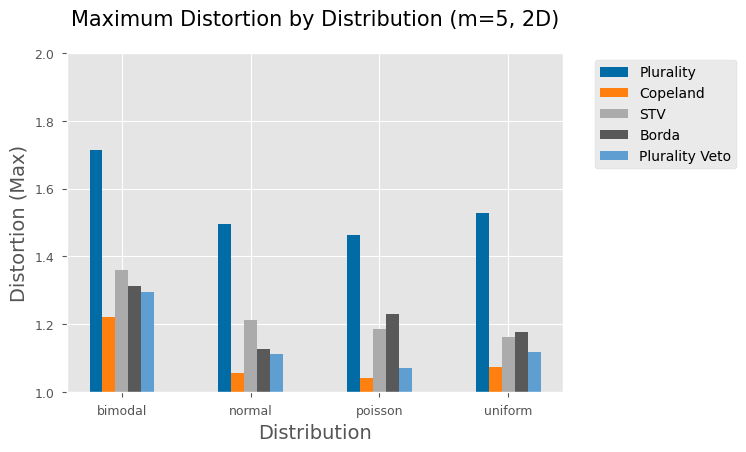

In [70]:
# Extract the data
distribution = group_by_distribution_m5.index
plurality_max = group_by_distribution_m5["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m5["Copeland_Distortion_max"]
stv_max = group_by_distribution_m5["STV_Distortion_max"]
borda_max = group_by_distribution_m5["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m5["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2* bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Maximum Distortion by Distribution (m=5, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,2)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()



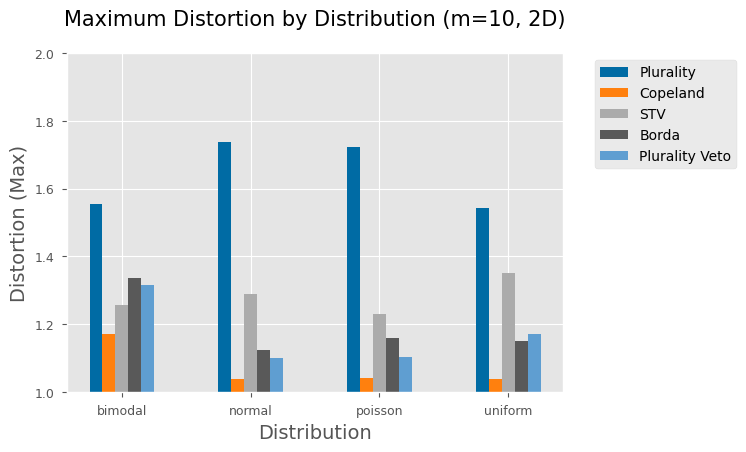

In [71]:
distribution = group_by_distribution_m10.index
plurality_max = group_by_distribution_m10["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m10["Copeland_Distortion_max"]
stv_max = group_by_distribution_m10["STV_Distortion_max"]
borda_max = group_by_distribution_m10["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m10["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Maximum Distortion by Distribution (m=10, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,2.0)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

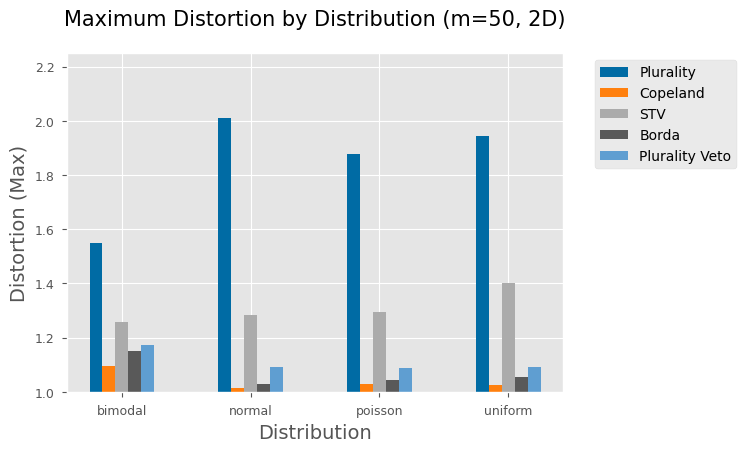

In [72]:
distribution = group_by_distribution_m50.index
plurality_max = group_by_distribution_m50["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m50["Copeland_Distortion_max"]
stv_max = group_by_distribution_m50["STV_Distortion_max"]
borda_max = group_by_distribution_m50["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m50["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Maximum Distortion by Distribution (m=50, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,2.25)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

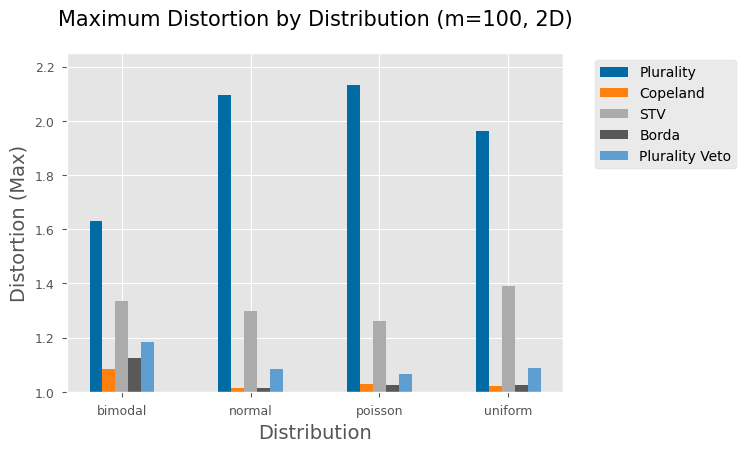

In [73]:
distribution = group_by_distribution_m100.index
plurality_max = group_by_distribution_m100["Plurality_Distortion_max"]
copeland_max = group_by_distribution_m100["Copeland_Distortion_max"]
stv_max = group_by_distribution_m100["STV_Distortion_max"]
borda_max = group_by_distribution_m100["Borda_Distortion_max"]
# star_max = group_by_distribution_m5["STAR_Distortion_max"]
pluralityVeto_max = group_by_distribution_m100["PluralityVeto_Distortion_max"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_max, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_max, width=bar_width, label="Copeland")
plt.bar(x, stv_max, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_max, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_max, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_max, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Maximum Distortion by Distribution (m=100, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,2.25)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

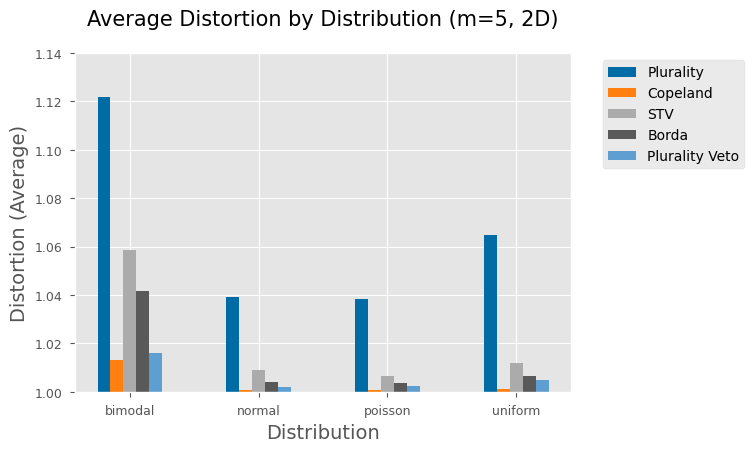

In [74]:

# Extract the data
distribution = group_by_distribution_m5.index
plurality_avg = group_by_distribution_m5["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m5["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m5["STV_Distortion_avg"]
borda_avg = group_by_distribution_m5["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m5["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by Distribution (m=5, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,1.14)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

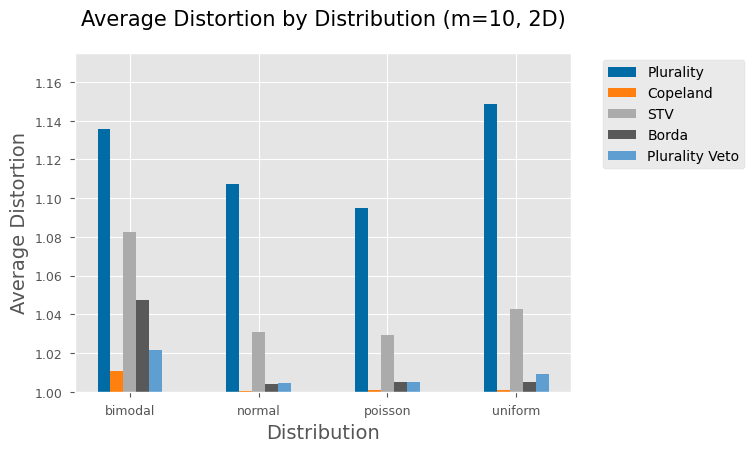

In [75]:
# Extract the data
distribution = group_by_distribution_m10.index
plurality_avg = group_by_distribution_m10["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m10["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m10["STV_Distortion_avg"]
borda_avg = group_by_distribution_m10["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m10["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Average Distortion", fontsize=14)
plt.title("Average Distortion by Distribution (m=10, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,1.175)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.show()

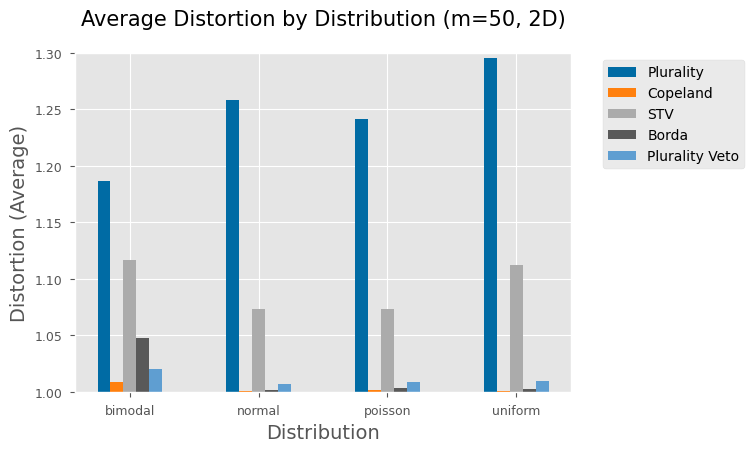

In [76]:
# Extract the data
distribution = group_by_distribution_m50.index
plurality_avg = group_by_distribution_m50["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m50["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m50["STV_Distortion_avg"]
borda_avg = group_by_distribution_m50["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m50["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by Distribution (m=50, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,1.3)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

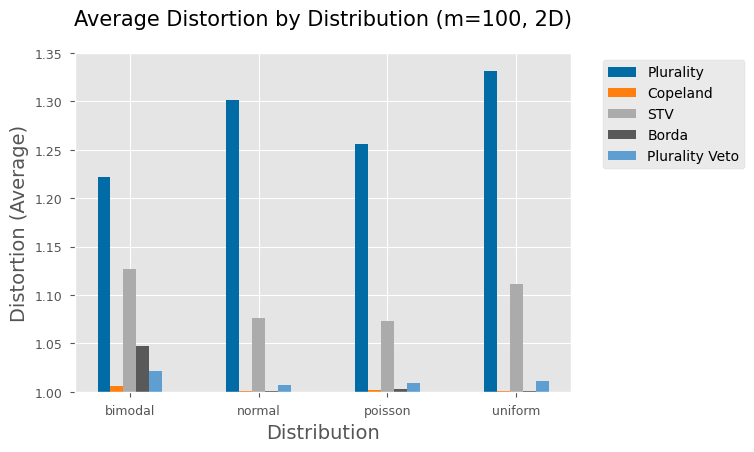

In [77]:
# Extract the data
distribution = group_by_distribution_m100.index
plurality_avg = group_by_distribution_m100["Plurality_Distortion_avg"]
copeland_avg = group_by_distribution_m100["Copeland_Distortion_avg"]
stv_avg = group_by_distribution_m100["STV_Distortion_avg"]
borda_avg = group_by_distribution_m100["Borda_Distortion_avg"]
# star_avg = group_by_distribution_m5["STAR_Distortion_avg"]
pluralityVeto_avg = group_by_distribution_m100["PluralityVeto_Distortion_avg"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, plurality_avg, width=bar_width, label="Plurality")
plt.bar(x - bar_width, copeland_avg, width=bar_width, label="Copeland")
plt.bar(x, stv_avg, width=bar_width, label="STV")
plt.bar(x + bar_width, borda_avg, width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, star_avg, width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, pluralityVeto_avg, width=bar_width, label="Plurality Veto")

# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by Distribution (m=100, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(1,1.35)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

In [78]:
# group_by_m = df.groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max"))
group_by_m_normal = df.loc[df['Distribution'] == "normal"].groupby("m").agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_uniform = df.loc[df['Distribution'] == "uniform"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_poisson = df.loc[df['Distribution'] == "poisson"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()
group_by_m_bimodal = df.loc[df['Distribution'] == "bimodal"].groupby('m').agg(Plurality_Distortion_avg = ("Plurality Distortion", "mean"), Plurality_Distortion_max = ("Plurality Distortion", "max"), Copeland_Distortion_avg = ("Copeland Distortion", "mean"), Copeland_Distortion_max = ("Copeland Distortion", "max"), STV_Distortion_avg = ("STV Distortion", "mean"), STV_Distortion_max = ("STV Distortion", "max"), Borda_Distortion_avg = ("Borda Distortion", "mean"), Borda_Distortion_max = ("Borda Distortion", "max"), STAR_Distortion_avg = ("STAR Distortion", "mean"), STAR_Distortion_max = ("STAR Distortion", "max"), PluralityVeto_Distortion_avg = ("Plurality Veto Distortion", "mean"), PluralityVeto_Distortion_max = ("Plurality Veto Distortion", "max")).reset_index()


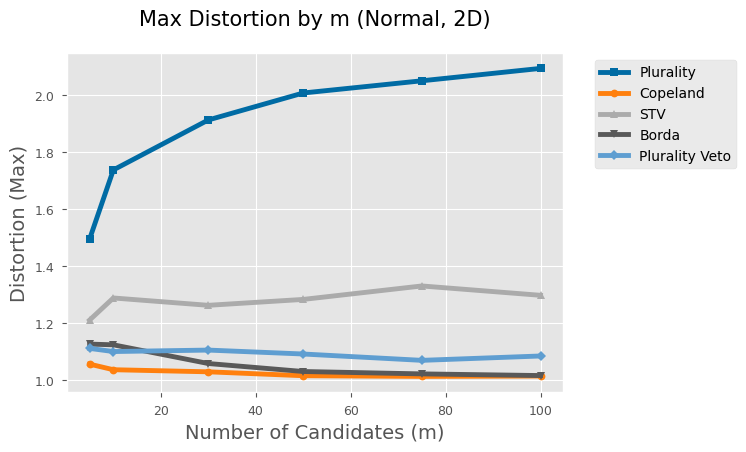

In [79]:
#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles1 = ['s-','o-','^-', 'v-','D-']


plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0],linewidth=3.5)
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1], linewidth=3.5)
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2], linewidth=3.5)
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3], linewidth=3.5)
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=3.5)

# Customize the plot
plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Max Distortion by m (Normal, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

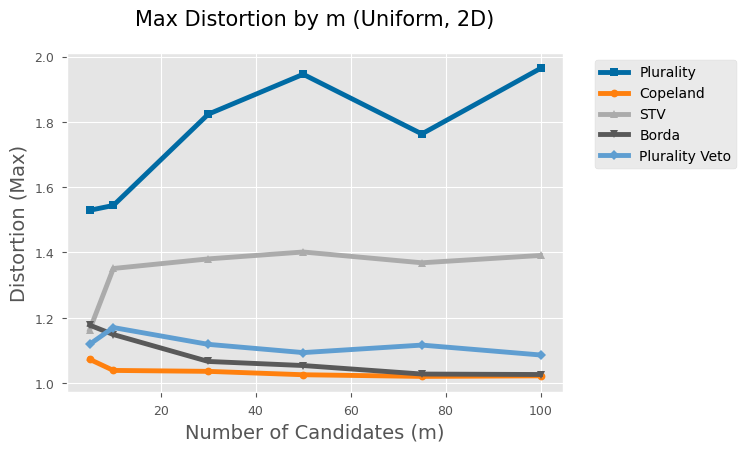

In [80]:
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"],styles1[0], label="Plurality",linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland",linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV",linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda",linewidth=3.5)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto",linewidth=3.5)

# Customize the plot

plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Max Distortion by m (Uniform, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()


# Show the plot
plt.show()

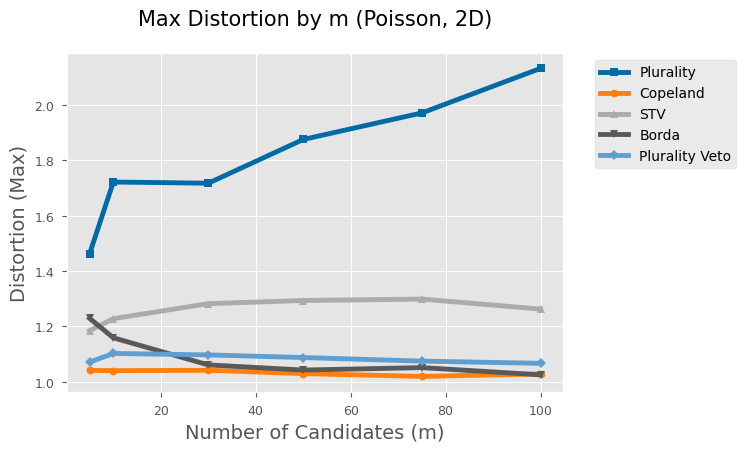

In [81]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"],styles1[0], label="Plurality",linewidth=3.5)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland",linewidth=3.5)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV",linewidth=3.5)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda",linewidth=3.5)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto",linewidth=3.5)

# Customize the plot
plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Max Distortion by m (Poisson, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

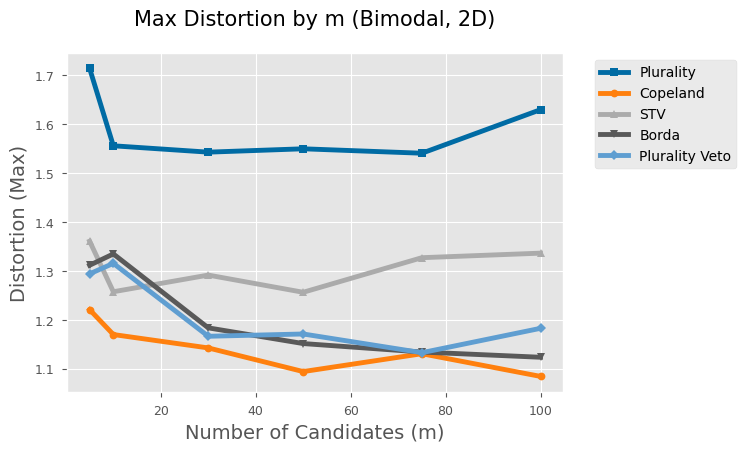

In [82]:

plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality",linewidth=3.5)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland",linewidth=3.5)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV",linewidth=3.5)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda",linewidth=3.5)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto",linewidth=3.5)

# Customize the plot

plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Max)", fontsize=14)
plt.title("Max Distortion by m (Bimodal, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

The code below put all 4 previous graphs into 1 figure (only run this for 1D graphs to put in main paper, those graphs for 2D and 3D in the appendix will be put seperately)

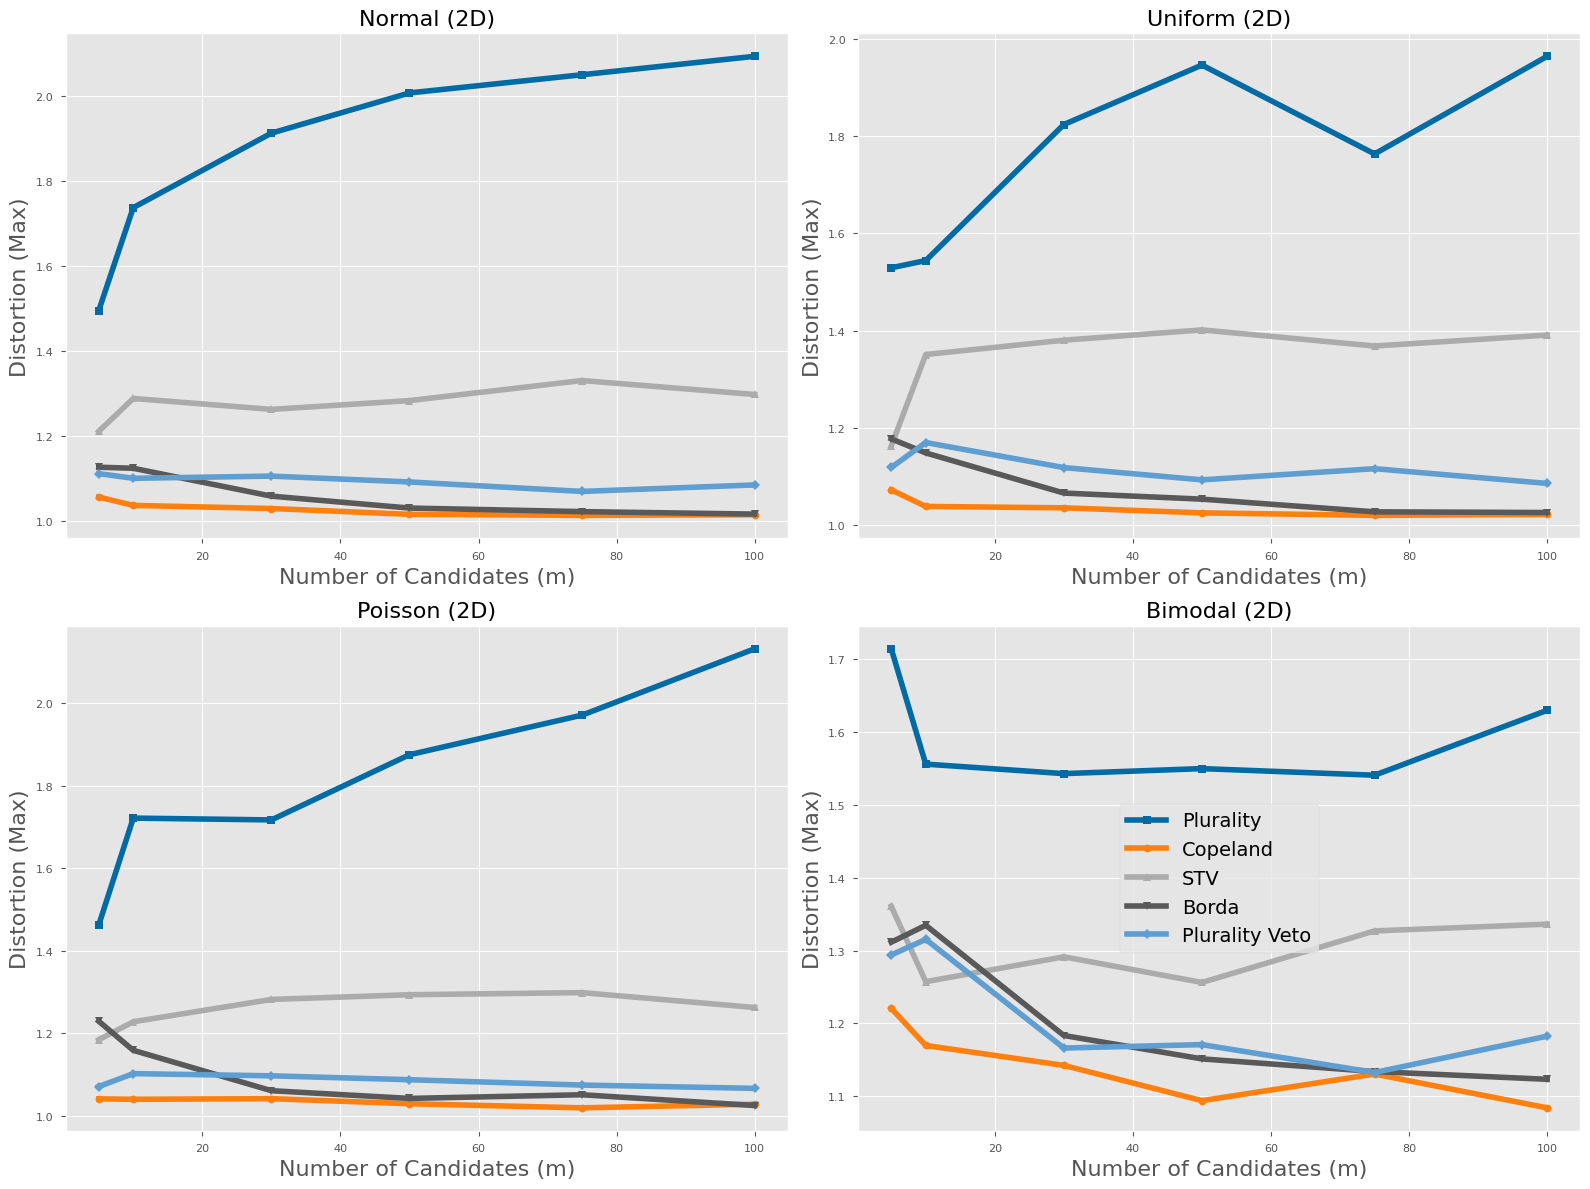

In [101]:

distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]

plt.figure(figsize=(16,12))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_max"],styles1[0], label="Plurality",color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_max"], styles1[1], label="Copeland", color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_max"], styles1[2], label="STV",color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_max"], styles1[3], label="Borda",color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto",color = CB_color_cycle[4], linewidth=4)
        plt.legend(fontsize=14)

    elif distribution == 'Normal':
        plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)

    elif distribution == 'Poisson':
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)

    elif distribution == 'Uniform':
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_max"], styles1[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_max"], styles1[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_max"], styles1[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_max"], styles1[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_max"], styles1[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)


    plt.title(f'{distribution} (2D)',fontsize=16)
    plt.xlabel("Number of Candidates (m)",fontsize=16)
    plt.ylabel("Distortion (Max)",fontsize=16)


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

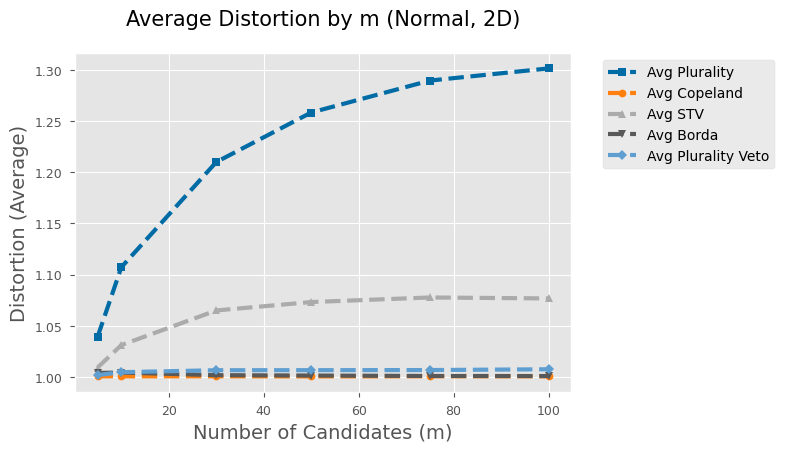

In [84]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0], linewidth=3)
plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1], linewidth=3)
plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2], linewidth=3)
plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3], linewidth=3)
plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4], linewidth=3)


# Customize the plot

plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by m (Normal, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

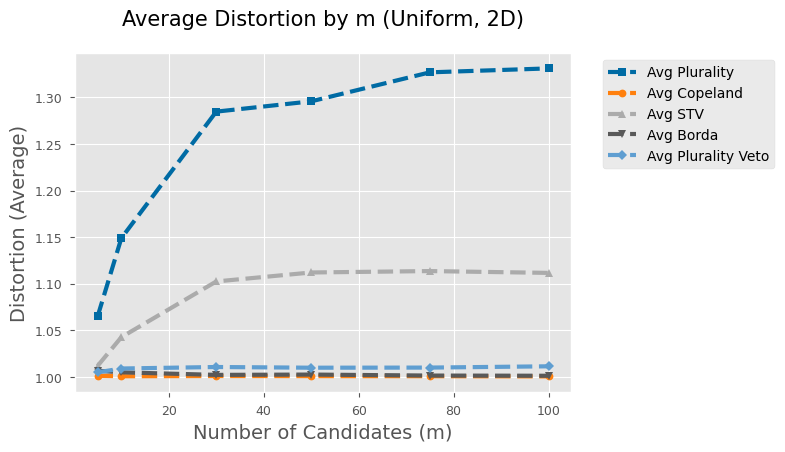

In [85]:
styles2 = ['s--','o--','^--', 'v--','D--']

plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0], linewidth=3)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1], linewidth=3)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2], linewidth=3)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3], linewidth=3)
plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4], linewidth=3)


# Customize the plot

plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by m (Uniform, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

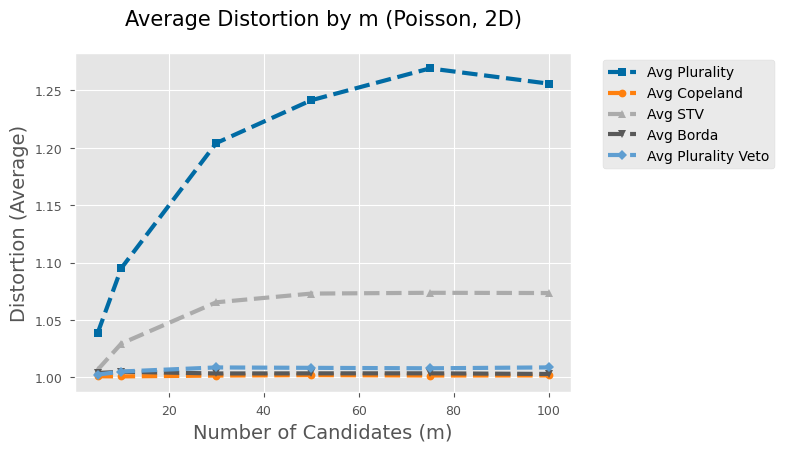

In [86]:
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0], linewidth=3)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1], linewidth=3)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2], linewidth=3)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3], linewidth=3)
plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4], linewidth=3)


# Customize the plot
plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by m (Poisson, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

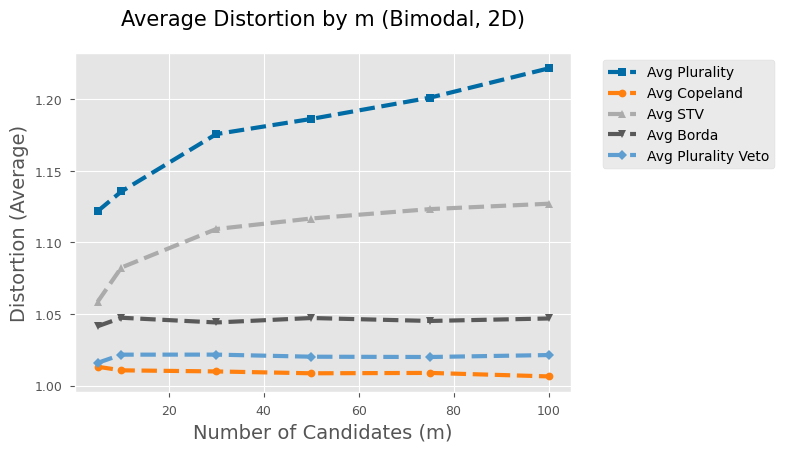

In [87]:
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_avg"], styles2[0], label="Avg Plurality", color = CB_color_cycle[0], linewidth=3)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_avg"], styles2[1], label="Avg Copeland", color = CB_color_cycle[1], linewidth=3)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_avg"], styles2[2], label="Avg STV", color = CB_color_cycle[2], linewidth=3)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_avg"], styles2[3], label="Avg Borda", color = CB_color_cycle[3], linewidth=3)
plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_avg"], styles2[4], label="Avg Plurality Veto", color = CB_color_cycle[4], linewidth=3)


# Customize the plot

plt.xlabel("Number of Candidates (m)", fontsize=14)
plt.ylabel("Distortion (Average)", fontsize=14)
plt.title("Average Distortion by m (Bimodal, 2D)", fontsize=15, pad=20)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

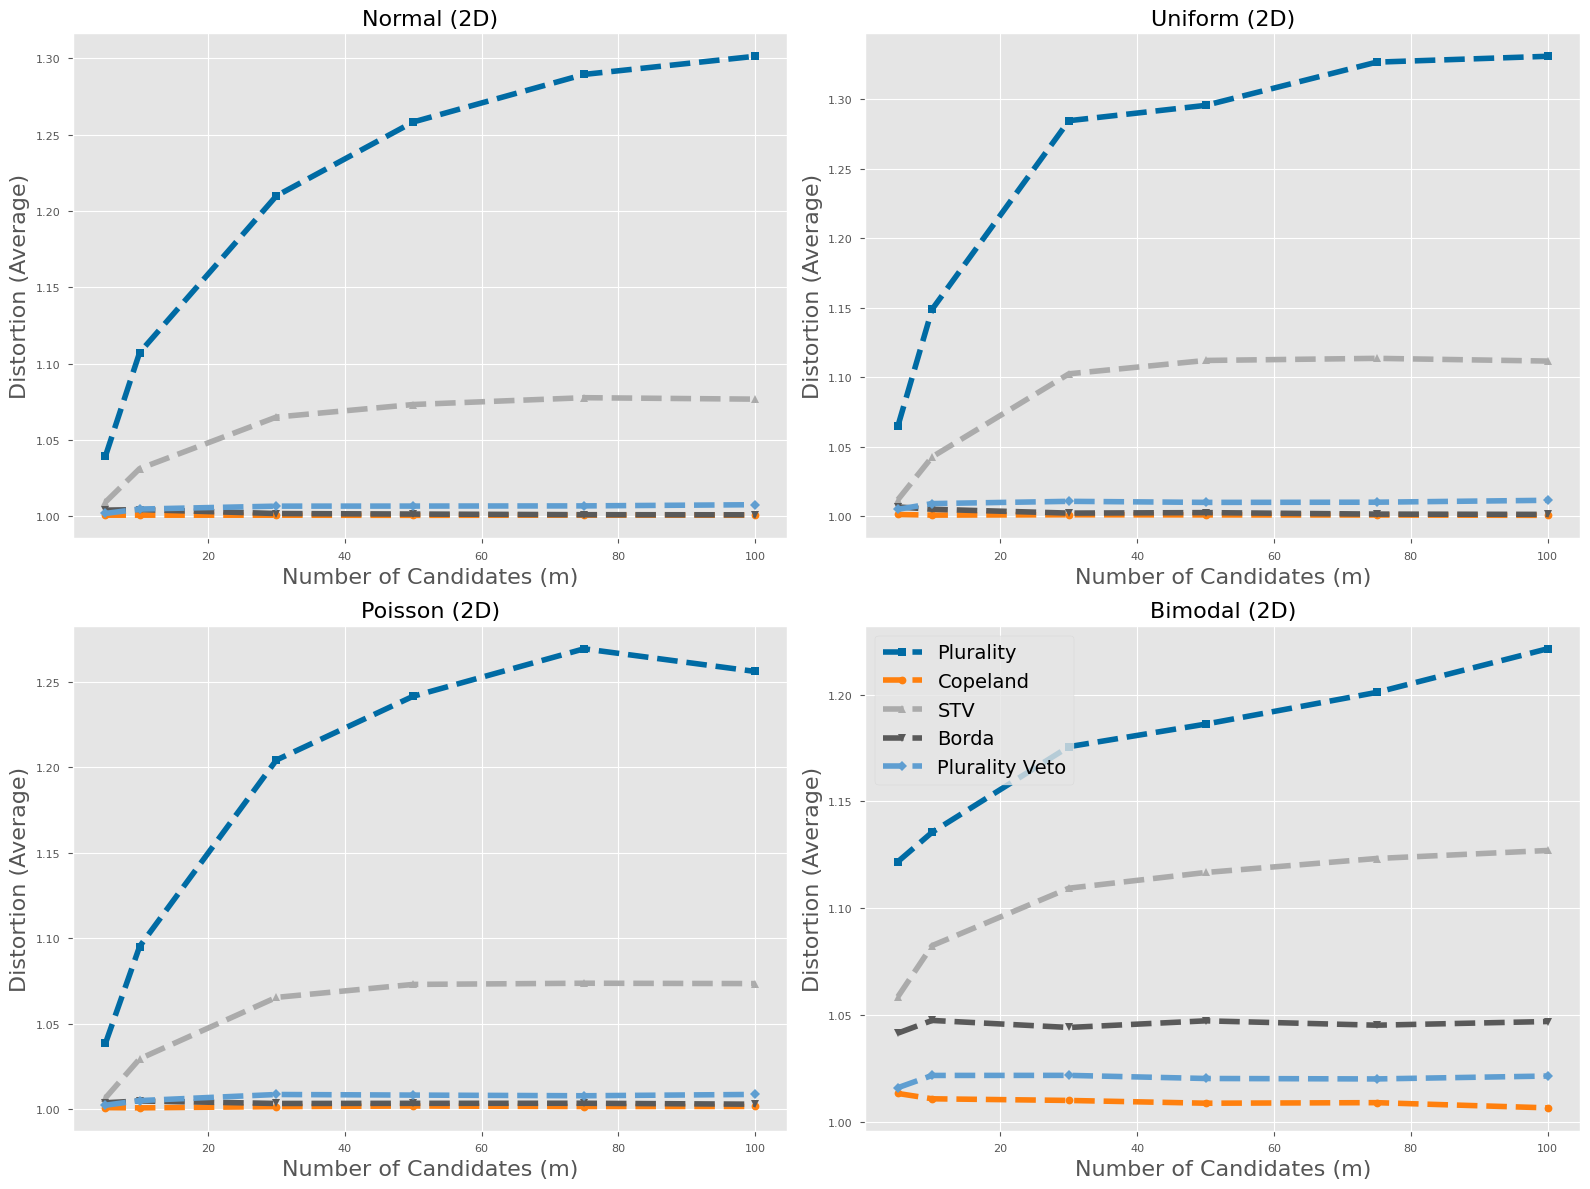

In [103]:
styles2 = ['s--','o--','^--', 'v--','D--']

distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]

plt.figure(figsize=(16,12))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Plurality_Distortion_avg"],styles2[0], label="Plurality",color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Copeland_Distortion_avg"], styles2[1], label="Copeland", color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["STV_Distortion_avg"], styles2[2], label="STV",color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["Borda_Distortion_avg"], styles2[3], label="Borda",color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_bimodal.m, group_by_m_bimodal["PluralityVeto_Distortion_avg"], styles2[4], label="Plurality Veto",color = CB_color_cycle[4], linewidth=4)
        plt.legend(fontsize=14)

    elif distribution == 'Normal':
        plt.plot(group_by_m_normal.m, group_by_m_normal["Plurality_Distortion_avg"], styles2[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["Copeland_Distortion_avg"], styles2[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["STV_Distortion_avg"], styles2[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["Borda_Distortion_avg"], styles2[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_normal.m, group_by_m_normal["PluralityVeto_Distortion_avg"], styles2[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)

    elif distribution == 'Poisson':
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Plurality_Distortion_avg"], styles2[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Copeland_Distortion_avg"], styles2[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["STV_Distortion_avg"], styles2[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["Borda_Distortion_avg"], styles2[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_poisson.m, group_by_m_poisson["PluralityVeto_Distortion_avg"], styles2[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)

    elif distribution == 'Uniform':
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Plurality_Distortion_avg"], styles2[0], label="Plurality", color = CB_color_cycle[0], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Copeland_Distortion_avg"], styles2[1], label="Copeland",  color = CB_color_cycle[1], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["STV_Distortion_avg"], styles2[2], label="STV", color = CB_color_cycle[2], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["Borda_Distortion_avg"], styles2[3], label="Borda", color = CB_color_cycle[3], linewidth=4)
        plt.plot(group_by_m_uniform.m, group_by_m_uniform["PluralityVeto_Distortion_avg"], styles2[4], label="Plurality Veto", color = CB_color_cycle[4], linewidth=4)


    plt.title(f'{distribution} (2D)',fontsize=16)
    plt.xlabel("Number of Candidates (m)",fontsize=16)
    plt.ylabel("Distortion (Average)",fontsize=16)


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

In [88]:
#accuracy by distribution

# Define the target value
target_value = 1

# Group by 'Distribution' and calculate the percentage of each methods choosing the OPT
accuracy_by_distribution_m5 = df.loc[df['m'] == 5].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m10 = df.loc[df['m'] == 10].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m50 = df.loc[df['m'] == 50].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

accuracy_by_distribution_m100 = df.loc[df['m'] == 100].groupby('Distribution').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

).reset_index()

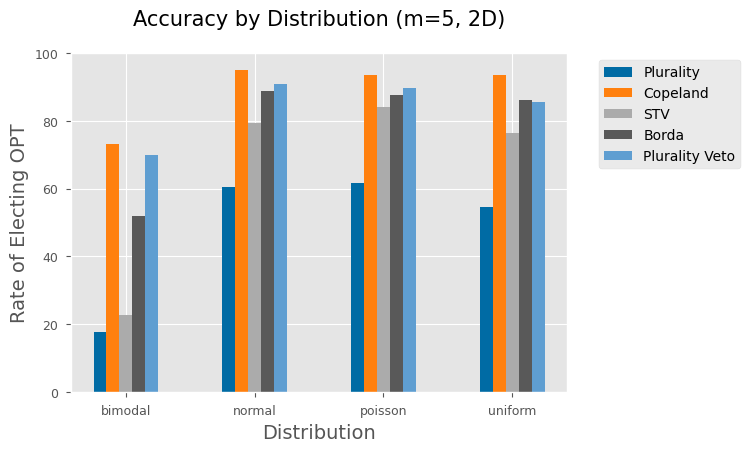

In [89]:

# Extract the data
distribution = accuracy_by_distribution_m5["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m5["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m5["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m5["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m5["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m5["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by Distribution (m=5, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.show()


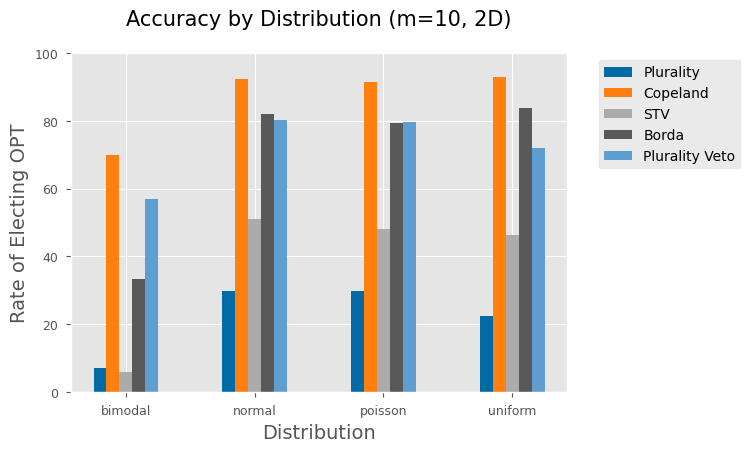

In [90]:
# Extract the data
distribution = accuracy_by_distribution_m10["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m10["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m10["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m10["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m10["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by Distribution (m=10, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


plt.show()

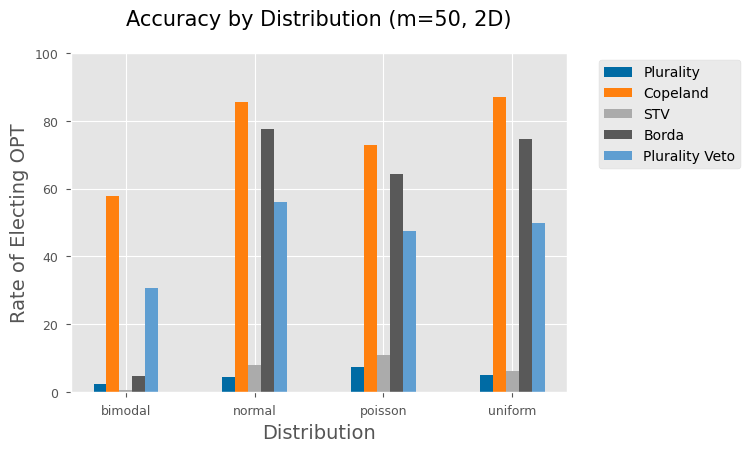

In [91]:
# Extract the data
distribution = accuracy_by_distribution_m50["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m50["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m50["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m50["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m50["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m50["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot

plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by Distribution (m=50, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

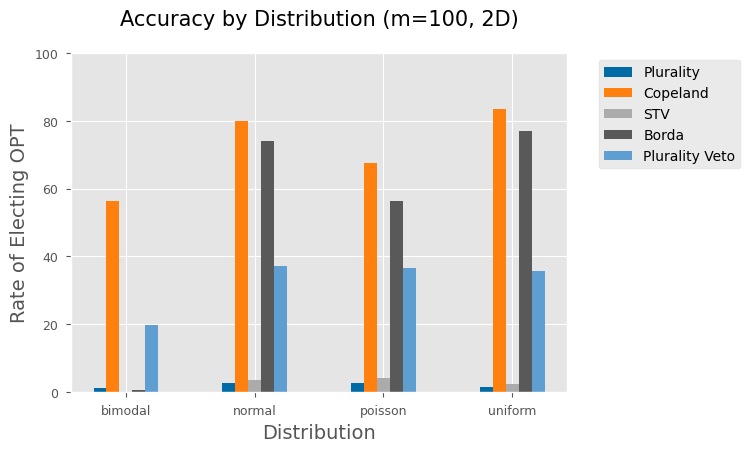

In [92]:
# Extract the data
distribution = accuracy_by_distribution_m100["Distribution"]

# Set the width of each bar
bar_width = 0.1

# Define x-axis positions for the bars
x = np.arange(len(distribution))

# Create the bar plots for each distortion metric
plt.bar(x - 2 * bar_width, accuracy_by_distribution_m100["Plurality_percentage"], width=bar_width, label="Plurality")
plt.bar(x - bar_width, accuracy_by_distribution_m100["Copeland_percentage"], width=bar_width, label="Copeland")
plt.bar(x, accuracy_by_distribution_m100["STV_percentage"], width=bar_width, label="STV")
plt.bar(x + bar_width, accuracy_by_distribution_m100["Borda_percentage"], width=bar_width, label="Borda")
# plt.bar(x + 2 * bar_width, accuracy_by_distribution_m10["STAR_percentage"], width=bar_width, label="STAR")
plt.bar(x + 2 * bar_width, accuracy_by_distribution_m100["PluralityVeto_percentage"], width=bar_width, label="Plurality Veto")


# Customize the plot
plt.xlabel("Distribution", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by Distribution (m=100, 2D)", fontsize=15, pad=20)
plt.xticks(x, distribution, fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.show()

While the differences in distortion are not substantial, Copeland outperforms other methods in terms of accurately selecting the OPT, achieving an accuracy rate of approximately 70-80%.
In contrast, Plurality exhibits the lowest accuracy, with only about 10-30% accuracy in selecting the OPT.

In [93]:
# Define the target value
target_value = 1

# Group by 'm' and calculate the percentage of each methods choosing the OPT
accuracy_by_m_normal = df.loc[df['Distribution'] == 'normal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_uniform = df.loc[df['Distribution'] == 'uniform'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_poisson = df.loc[df['Distribution'] == 'poisson'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

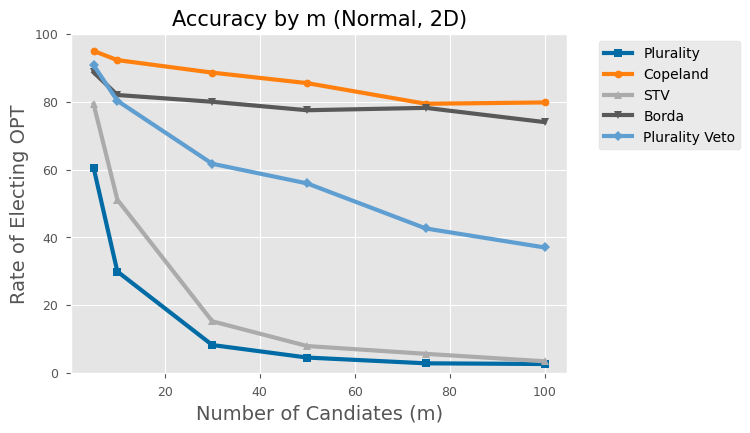

In [94]:
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Plurality_percentage"], styles1[0], label="Plurality", linewidth=3)
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Copeland_percentage"], styles1[1], label="Copeland", linewidth=3)
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STV_percentage"],styles1[2],  label="STV", linewidth=3)
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["Borda_percentage"], styles1[3],label="Borda", linewidth=3)
# plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_normal.index, accuracy_by_m_normal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", linewidth=3)

# Customize the plot
plt.xlabel("Number of Candiates (m)", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by m (Normal, 2D)", fontsize=15)
plt.xticks(fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)


# Show the plot
plt.show()

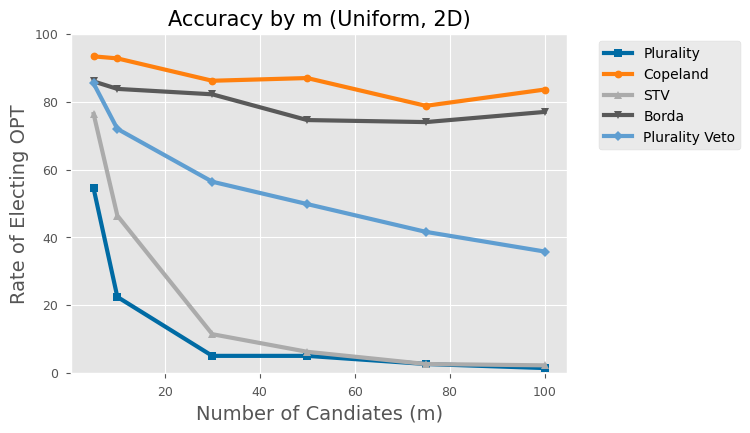

In [95]:
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Plurality_percentage"], styles1[0], label="Plurality", linewidth=3)
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Copeland_percentage"], styles1[1], label="Copeland", linewidth=3)
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STV_percentage"],styles1[2],  label="STV", linewidth=3)
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["Borda_percentage"], styles1[3],label="Borda", linewidth=3)
# plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_uniform.index, accuracy_by_m_uniform["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", linewidth=3)

# Customize the plot

plt.xlabel("Number of Candiates (m)", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by m (Uniform, 2D)", fontsize=15)
plt.xticks(fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

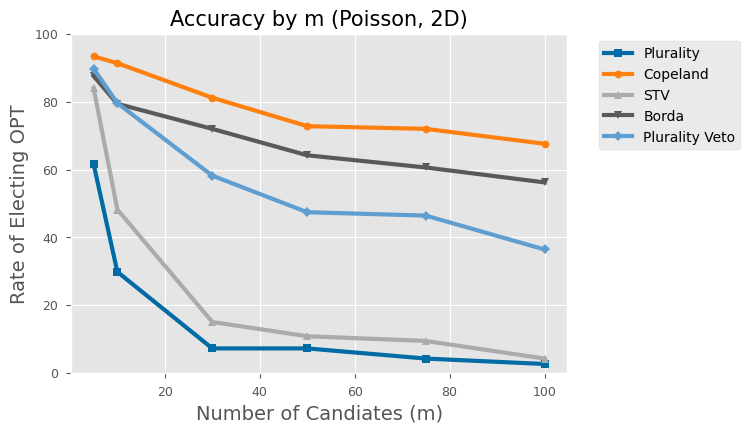

In [96]:
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Plurality_percentage"], styles1[0], label="Plurality", linewidth=3)
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Copeland_percentage"], styles1[1], label="Copeland", linewidth=3)
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STV_percentage"],styles1[2],  label="STV", linewidth=3)
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["Borda_percentage"], styles1[3],label="Borda", linewidth=3)
# plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_poisson.index, accuracy_by_m_poisson["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", linewidth=3)

# Customize the plot

plt.xlabel("Number of Candiates (m)", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by m (Poisson, 2D)", fontsize=15)
plt.xticks(fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

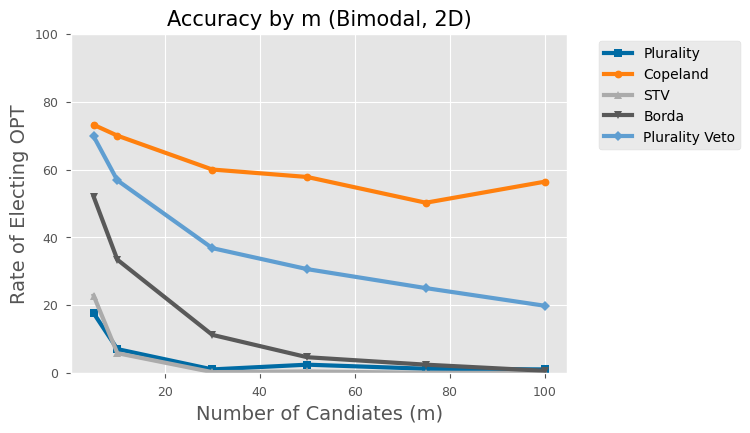

In [97]:
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Plurality_percentage"], styles1[0], label="Plurality", linewidth=3)
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Copeland_percentage"], styles1[1], label="Copeland", linewidth=3)
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STV_percentage"],styles1[2],  label="STV", linewidth=3)
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["Borda_percentage"], styles1[3],label="Borda", linewidth=3)
# plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["STAR_percentage"], label="STAR")
plt.plot(accuracy_by_m_bimodal.index, accuracy_by_m_bimodal["PluralityVeto_percentage"], styles1[4], label="Plurality Veto", linewidth=3)

# Customize the plot
plt.xlabel("Number of Candiates (m)", fontsize=14)
plt.ylabel("Rate of Electing OPT", fontsize=14)
plt.title("Accuracy by m (Bimodal, 2D)", fontsize=15)
plt.xticks(fontsize=9)
plt.ylim(0,100)
plt.yticks(fontsize=9)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Show the plot
plt.show()

In [98]:
# Define the target value
target_value = 1

# Group by 'm' and calculate the percentage of each methods choosing the OPT
accuracy_by_m_normal = df.loc[df['Distribution'] == 'normal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_uniform = df.loc[df['Distribution'] == 'uniform'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_poisson = df.loc[df['Distribution'] == 'poisson'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

accuracy_by_m_bimodal = df.loc[df['Distribution'] == 'bimodal'].groupby('m').agg(
    Plurality_percentage=('Plurality Distortion', lambda x: (x == target_value).mean() * 100),
    Copeland_percentage=('Copeland Distortion', lambda x: (x == target_value).mean() * 100),
    STV_percentage=('STV Distortion', lambda x: (x == target_value).mean() * 100),
    STAR_percentage=('STAR Distortion', lambda x: (x == target_value).mean() * 100),
    Borda_percentage=('Borda Distortion', lambda x: (x == target_value).mean() * 100),
    PluralityVeto_percentage=('Plurality Veto Distortion', lambda x: (x == target_value).mean() * 100)

)

In [99]:
accuracy_by_m_bimodal = pd.DataFrame(accuracy_by_m_bimodal)
accuracy_by_m_bimodal.insert(0,"m",[5,10,30,50,75,100])

accuracy_by_m_normal = pd.DataFrame(accuracy_by_m_normal)
accuracy_by_m_normal.insert(0,"m",[5,10,30,50,75,100])

accuracy_by_m_uniform = pd.DataFrame(accuracy_by_m_uniform)
accuracy_by_m_uniform.insert(0,"m",[5,10,30,50,75,100])

accuracy_by_m_poisson = pd.DataFrame(accuracy_by_m_poisson)
accuracy_by_m_poisson.insert(0,"m",[5,10,30,50,75,100])


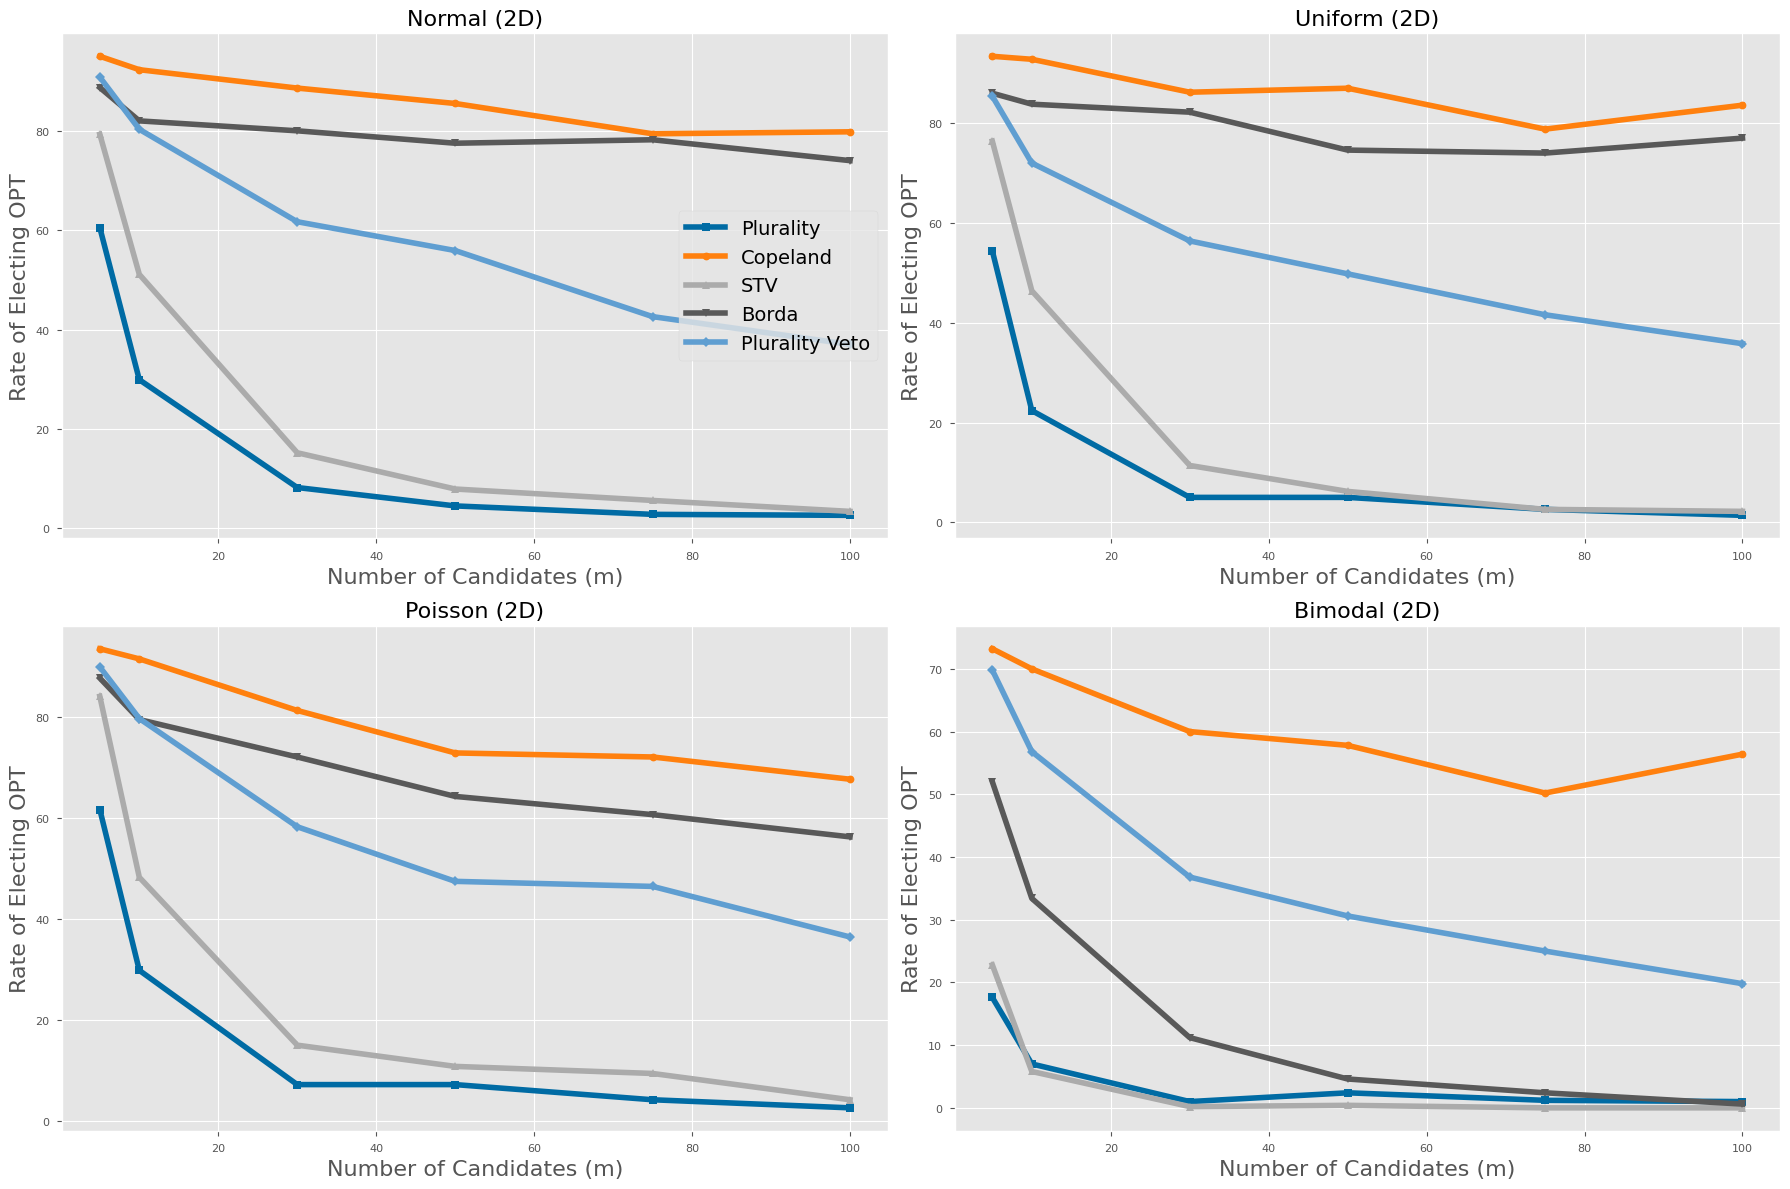

In [100]:
distributions = ["Normal", "Uniform", "Poisson", "Bimodal"]
#color palatte for the colorblind
CB_color_cycle = ['#006BA4', '#FF800E', '#ABABAB', '#595959',
                 '#5F9ED1', '#C85200', '#898989', '#A2C8EC', '#FFBC79', '#CFCFCF']
styles2 = ['s-','o-','^-', 'v-','D-']

plt.figure(figsize=(18,12))
for i, distribution in enumerate(distributions, 1):
    plt.subplot(2, 2, i)  # Create a subplot for each mechanism

    if distribution == 'Bimodal':
        plt.plot(accuracy_by_m_bimodal.m, accuracy_by_m_bimodal["Plurality_percentage"],styles2[0], label="Plurality", linewidth=4)
        plt.plot(accuracy_by_m_bimodal.m, accuracy_by_m_bimodal["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4)
        plt.plot(accuracy_by_m_bimodal.m, accuracy_by_m_bimodal["STV_percentage"], styles2[2], label="STV", linewidth=4)
        plt.plot(accuracy_by_m_bimodal.m, accuracy_by_m_bimodal["Borda_percentage"], styles2[3], label="Borda", linewidth=4)
        plt.plot(accuracy_by_m_bimodal.m, accuracy_by_m_bimodal["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4)

    elif distribution == 'Normal':
        plt.plot(accuracy_by_m_normal.m, accuracy_by_m_normal["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(accuracy_by_m_normal.m, accuracy_by_m_normal["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(accuracy_by_m_normal.m, accuracy_by_m_normal["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(accuracy_by_m_normal.m, accuracy_by_m_normal["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(accuracy_by_m_normal.m, accuracy_by_m_normal["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])
        plt.legend(fontsize=14)

    elif distribution == 'Poisson':
        plt.plot(accuracy_by_m_poisson.m, accuracy_by_m_poisson["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(accuracy_by_m_poisson.m, accuracy_by_m_poisson["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(accuracy_by_m_poisson.m, accuracy_by_m_poisson["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(accuracy_by_m_poisson.m, accuracy_by_m_poisson["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(accuracy_by_m_poisson.m, accuracy_by_m_poisson["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])

    elif distribution == 'Uniform':
        plt.plot(accuracy_by_m_uniform.m, accuracy_by_m_uniform["Plurality_percentage"], styles2[0], label="Plurality", linewidth=4, color = CB_color_cycle[0])
        plt.plot(accuracy_by_m_uniform.m, accuracy_by_m_uniform["Copeland_percentage"], styles2[1], label="Copeland", linewidth=4,  color = CB_color_cycle[1])
        plt.plot(accuracy_by_m_uniform.m, accuracy_by_m_uniform["STV_percentage"], styles2[2], label="STV", linewidth=4, color = CB_color_cycle[2])
        plt.plot(accuracy_by_m_uniform.m, accuracy_by_m_uniform["Borda_percentage"], styles2[3], label="Borda", linewidth=4, color = CB_color_cycle[3])
        plt.plot(accuracy_by_m_uniform.m, accuracy_by_m_uniform["PluralityVeto_percentage"], styles2[4], label="Plurality Veto", linewidth=4, color = CB_color_cycle[4])


    plt.title(f'{distribution} (2D)',fontsize=16)
    plt.xlabel("Number of Candidates (m)",fontsize=16)
    plt.ylabel("Rate of Electing OPT",fontsize=16)


plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()